#  Predicting CO2 Emissions for Climate Action Using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [2]:
df = pd.read_csv('data/owid-co2-data.csv')
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [6]:
# get the key feature for predicting co2 emissions with co2 being the target column
columns = ['country', 'year','population', 'gdp', 'primary_energy_consumption', 'oil_co2', 'cement_co2', 'other_industry_co2', 'co2']
df = df[columns]

#filter for recent years 1990-2023
df = df[(df['year'] >= 1990) & (df['year'] <= 2023)]
df.head()

,country,year,population,gdp,primary_energy_consumption,oil_co2,cement_co2,other_industry_co2,co2
240,Afghanistan,1990,12045664.0,1.306598e+10,31.746,1.271,0.046,NaN,2.024
241,Afghanistan,1991,12238879.0,1.204736e+10,13.903,1.204,0.046,NaN,1.914
242,Afghanistan,1992,13278982.0,1.267754e+10,9.168,1.030,0.046,NaN,1.482
243,Afghanistan,1993,14943174.0,9.834582e+09,9.105,1.048,0.047,NaN,1.487
244,Afghanistan,1994,16250799.0,7.919857e+09,8.816,1.032,0.047,NaN,1.454


In [7]:
# get more information about the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8663 entries, 240 to 50190
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     8663 non-null   object 
 1   year                        8663 non-null   int64  
 2   population                  7820 non-null   float64
 3   gdp                         5421 non-null   float64
 4   primary_energy_consumption  7048 non-null   float64
 5   oil_co2                     7902 non-null   float64
 6   cement_co2                  7647 non-null   float64
 7   other_industry_co2          2108 non-null   float64
 8   co2                         8370 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 676.8+ KB


,year,population,gdp,primary_energy_consumption,oil_co2,cement_co2,other_industry_co2,co2
count,8663.000000,7.820000e+03,5.421000e+03,7048.000000,7902.000000,7647.000000,2108.000000,8370.000000
mean,2006.512063,1.255032e+08,6.987382e+11,2582.744875,209.962297,21.410411,19.083851,798.454955
std,9.805994,5.968513e+08,5.091403e+12,12210.132271,935.434200,116.208095,45.883941,3104.705894
min,1990.000000,5.010000e+02,2.571720e+08,0.000000,0.003000,0.000000,0.000000,0.000000
25%,1998.000000,7.953778e+05,1.898708e+10,6.926750,0.835000,0.000000,0.544750,1.092000
50%,2007.000000,6.331119e+06,6.163478e+10,59.412500,5.166500,0.418000,2.245000,10.868500
75%,2015.000000,2.542895e+07,2.958233e+11,445.082250,36.450500,2.927500,8.835500,123.559500
max,2023.000000,8.091735e+09,1.301126e+14,172119.062000,12411.968000,1696.308000,305.381000,37791.570000


In [8]:
# let us see if there are null values for data preprocessing
df.isnull().sum()

country                          0
year                             0
population                     843
gdp                           3242
primary_energy_consumption    1615
oil_co2                        761
cement_co2                    1016
other_industry_co2            6555
co2                            293
dtype: int64

In [9]:
# handle missing values- fill with mean for numerical values
numerical_cols = ['population', 'gdp', 'primary_energy_consumption', 'oil_co2', 'cement_co2', 'other_industry_co2', 'co2']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [10]:
# save the cleaned dataset
df.to_csv('data/owid_co2_cleanned.csv', index=False)
df.head()

,country,year,population,gdp,primary_energy_consumption,oil_co2,cement_co2,other_industry_co2,co2
240,Afghanistan,1990,12045664.0,1.306598e+10,31.746,1.271,0.046,19.083851,2.024
241,Afghanistan,1991,12238879.0,1.204736e+10,13.903,1.204,0.046,19.083851,1.914
242,Afghanistan,1992,13278982.0,1.267754e+10,9.168,1.030,0.046,19.083851,1.482
243,Afghanistan,1993,14943174.0,9.834582e+09,9.105,1.048,0.047,19.083851,1.487
244,Afghanistan,1994,16250799.0,7.919857e+09,8.816,1.032,0.047,19.083851,1.454


In [11]:
# Load the cleaned dataset
df = pd.read_csv('data/owid_co2_cleanned.csv')
df.head()

,country,year,population,gdp,primary_energy_consumption,oil_co2,cement_co2,other_industry_co2,co2
0,Afghanistan,1990,12045664.0,1.306598e+10,31.746,1.271,0.046,19.083851,2.024
1,Afghanistan,1991,12238879.0,1.204736e+10,13.903,1.204,0.046,19.083851,1.914
2,Afghanistan,1992,13278982.0,1.267754e+10,9.168,1.030,0.046,19.083851,1.482
3,Afghanistan,1993,14943174.0,9.834582e+09,9.105,1.048,0.047,19.083851,1.487
4,Afghanistan,1994,16250799.0,7.919857e+09,8.816,1.032,0.047,19.083851,1.454


In [12]:
# Preprocess data
df.fillna(df.mean(numeric_only=True), inplace=True)

In [14]:
df[numerical_cols].corr()

,population,gdp,primary_energy_consumption,oil_co2,cement_co2,other_industry_co2,co2
population,1.000000,0.474224,0.883251,0.860862,0.903059,0.842522,0.768130
gdp,0.474224,1.000000,0.520227,0.478266,0.506334,0.454356,0.431519
primary_energy_consumption,0.883251,0.520227,1.000000,0.961368,0.885066,0.895433,0.837390
oil_co2,0.860862,0.478266,0.961368,1.000000,0.811201,0.839777,0.831237
cement_co2,0.903059,0.506334,0.885066,0.811201,1.000000,0.900890,0.779272
other_industry_co2,0.842522,0.454356,0.895433,0.839777,0.900890,1.000000,0.773007
co2,0.768130,0.431519,0.837390,0.831237,0.779272,0.773007,1.000000


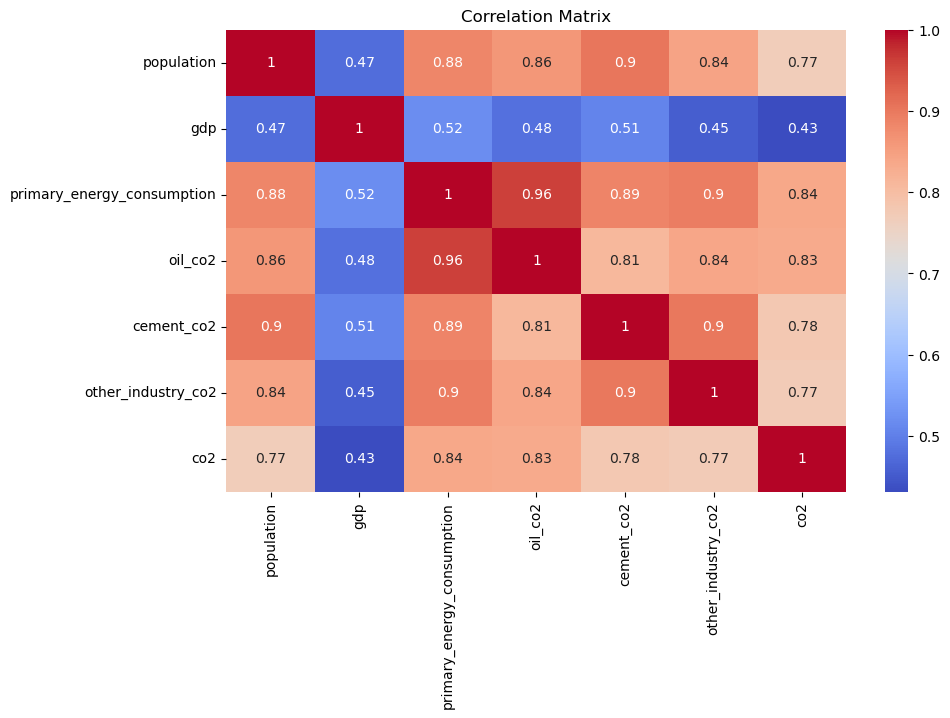

In [16]:
# Visualize the correlation of the dataset
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()


In [17]:
# Define features and label
X = df[numerical_cols].drop('co2', axis=1)
y = df['co2']

In [18]:
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize the models (Random Forest and Linear Regressoes) and fit them with the data
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# train the models on the data
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# make predictions
lr_y_preds = lr_model.predict(X_test)
rf_y_preds = rf_model.predict(X_test)

In [21]:
#display the performance metrics of the two models
lr_mae = mean_absolute_error(y_test, lr_y_preds)
lr_r2_score = r2_score(y_test, lr_y_preds)

rf_mae = mean_absolute_error(y_test, rf_y_preds)
rf_r2_score = r2_score(y_test, rf_y_preds)

# print('Accuracy of LR: ', accuracy_score(y_test, lr_y_preds))
print('MAE of LR: ', lr_mae)
print('R² od LR: ', lr_r2_score)

# print('Accuracy of RF; ', accuracy_score(y_test, rf_y_pres))
print('='*30)
print('MAE of Rf: ', rf_mae)
print('R² of RF: ', rf_r2_score)

MAE of LR:  442.1174873748617
R² od LR:  0.7679269621606681
MAE of Rf:  325.01862206209023
R² of RF:  0.818671440830986


In [22]:
# Compare the model performance py their metrics
models = ['Linear Regression','Random Forest']
mae = [lr_mae, rf_mae]
r2 = [lr_r2_score, rf_r2_score]

metrics_df = pd.DataFrame({ 'Model': models, 'MAE':mae, 'R²': r2 })
metrics_df

,Model,MAE,R²
0,Linear Regression,442.117487,0.767927
1,Random Forest,325.018622,0.818671


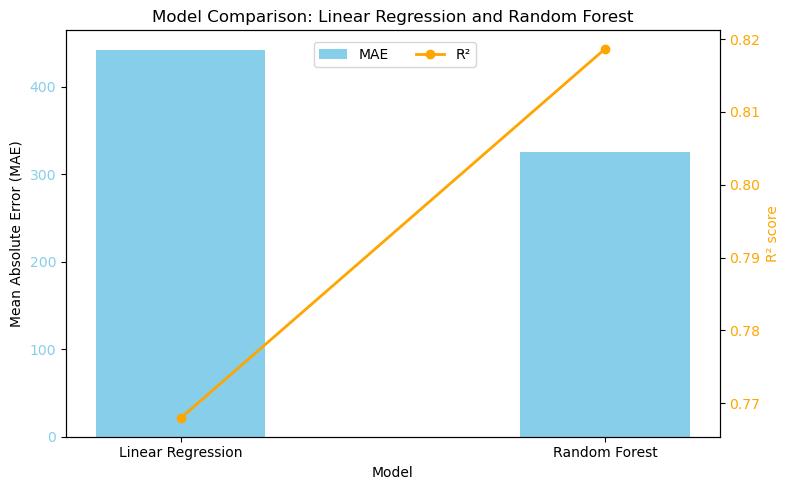

In [23]:
# plot the performance metrics
fig, ax1 = plt.subplots(figsize=(8,5))

# plot bar plot for the MAE
ax1.bar(metrics_df['Model'], metrics_df['MAE'], color='skyblue', width=0.4, label='MAE')
ax1.set(ylabel='Mean Absolute Error (MAE)', xlabel='Model')
ax1.tick_params(axis='y', labelcolor='skyblue')


# create second axis for R² score
ax2 = ax1.twinx()
ax2.plot(metrics_df['Model'], metrics_df['R²'], color='orange', label='R²', marker='o', linewidth=2)
ax2.set_ylabel('R² score', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

#set title and legend
plt.title('Model Comparison: Linear Regression and Random Forest')
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.92), ncols=2)
plt.savefig('model_comparison.png')

plt.show()

In [24]:
from matplotlib import colormaps
list(colormaps)

#use seaborn's white grid style
sns.set_style('whitegrid')

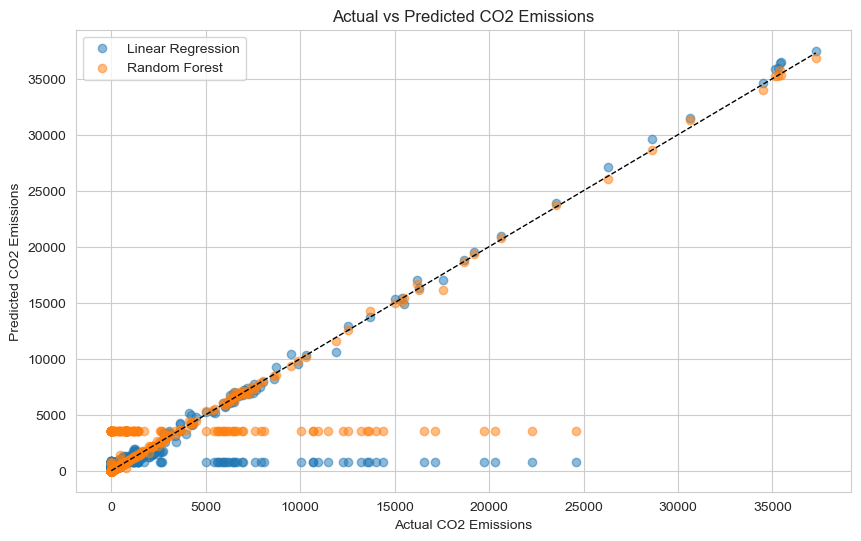

In [25]:
# visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_y_preds, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, rf_y_preds, label='Random Forest', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()
plt.savefig('predictions.png')
plt.show()


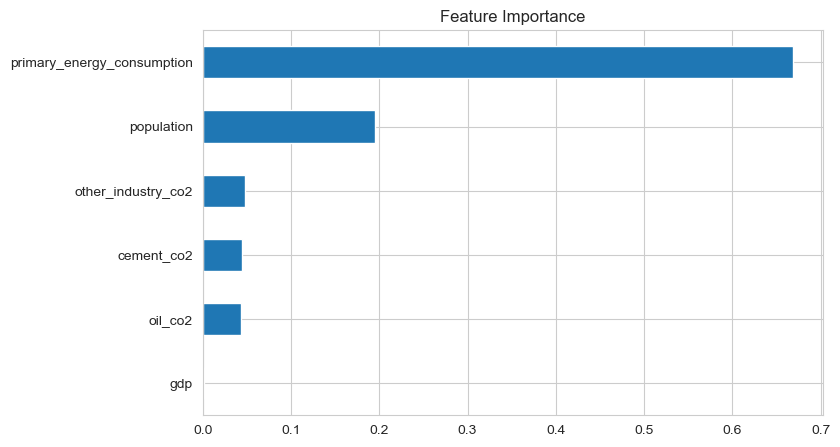

In [26]:
# feature importances in Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Feature Importance')
plt.savefig('feature_importance.png')
plt.show()

In [27]:
# save the model
import joblib
joblib.dump(rf_model, 'rf_co2_model.pkl')

['rf_co2_model.pkl']

In [28]:
feature_importance

population                    0.194738
gdp                           0.000902
primary_energy_consumption    0.668893
oil_co2                       0.042833
cement_co2                    0.044808
other_industry_co2            0.047826
dtype: float64

In [29]:
feature_importance.sum()

np.float64(1.0)